# Graph Structure

-------------------------------------------------

The raw code for this Jupyter notebook is by default hidden for easier reading. The main focus of this particular page of the notebook is on the graphs and their interpretation. To toggle on/off the raw code, click below:

In [55]:
# Setup Code toggle button
from IPython.core.display import HTML  

HTML(''' 
<center><h3>
<a href="javascript:code_toggle()">Talk is cheap, show me the code.</a>
</center></h3>
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
''')

In [164]:
# 22.01.2017
# Disable warnings because of nx.draw() output:
# warnings.warn("axes.hold is deprecated, will be removed in 3.0")
import warnings
warnings.filterwarnings('ignore')

# Setup notebook theme
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme(get_themes()[1])

## Web Structure Metrics

---------------------------------------------

* Diameter
* Degree distributions
* Connected components

#### Macroscopic structure

About 90% of the nodes comprise a single highly connected component, and each of the four sets are aproxametly the same size.

  1. (SCC) Strongly Connected Component: Pages reach eachother by direct links.
  2. IN: Pages that link into the SCC, but are not linked back to from the SCC.
  3. OUT: Pages that are linked to by the SCC, but do not link back.
  4. TENDRILS: Pages that can not reach the SCC, and cannot be reached from the SCC.



The power law for in-degree: the probability that a node has an in-degree $i$
is proportional to,

$$
    \frac{1}{i^x} \quad \Big| \quad x > 1
$$

In [69]:
import networkx as nx

# Build the graph
G = nx.Graph()
G.add_nodes_from('ABCDEFGHIKLMNOP')
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('C', 'A'), \
                  ('C', 'G'), ('E', 'F'), ('G', 'C'), ('G', 'H'), \
                  ('I', 'H'), ('I', 'K'), ('L', 'D'), ('M', 'A'), \
                  ('M', 'N'), ('N', 'D'), ('O', 'A'), ('P', 'G')])

print("Number of nodes: {}".format(G.number_of_nodes()))
print("Number of edges: {}".format(G.number_of_edges()))

Number of nodes: 15
Number of edges: 15


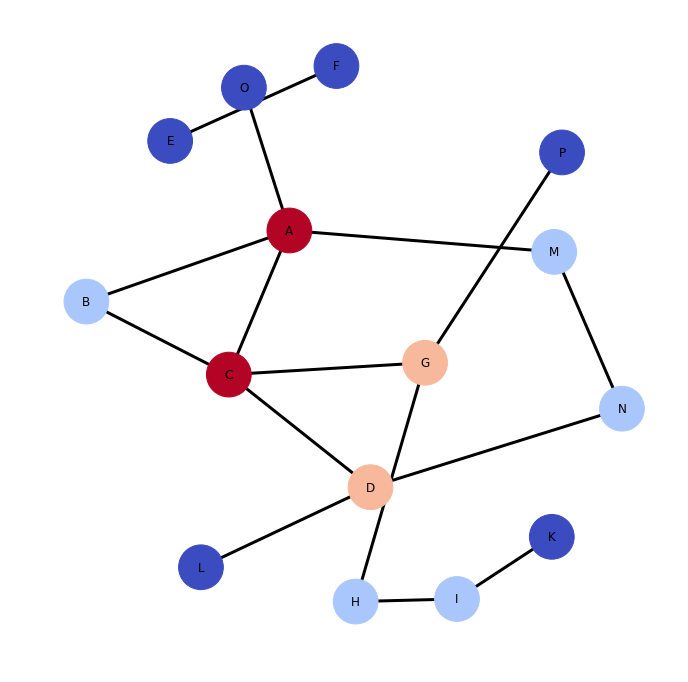

In [162]:
import matplotlib.pyplot as plt

# with nodes colored by degree
node_color=[float(G.degree(v)) for v in G]
cmap = plt.cm.YlGnBu

plt.figure(figsize=(9,9))
nx.draw(G, node_color=node_color, node_size=2000, edge_color='k', \
        width=3, with_labels=True, cmap=plt.cm.coolwarm)

plt.show()